In [1]:
import pandas as pd
import json
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
df_governismo = pd.read_excel('./data/fat_governismo.xlsx')
df_parls = pd.read_excel('./data/fat_parlamentares.xlsx')
df_ocupacoes = pd.read_excel('./data/dim_ocupacoes.xlsx')
df_partidos = pd.read_excel('./data/dim_partidos.xlsx')

In [29]:
df_merge = df_governismo.merge(df_parls, on='id_parl')
df_merge = df_merge[
    (df_merge['ano_eleicao'] + 1 == df_merge['ano']) |
    (df_merge['ano_eleicao'] + 2 == df_merge['ano']) | 
    (df_merge['ano_eleicao'] + 3 == df_merge['ano']) | 
    (df_merge['ano_eleicao'] + 4 == df_merge['ano']) 
    ].reset_index(drop=True)

In [57]:
# RESTA DUPLICADOS, validar!

df_merge = df_merge.drop_duplicates(['ano', 'id_parl'])

In [59]:
df_merge_ocup = df_merge.merge(df_ocupacoes, on='ocupacao_declarada')

In [78]:
df_merge_ocup = df_merge_ocup[df_merge_ocup['tot_votacoes'] > 5]

In [83]:
df_merge_ocup[df_merge_ocup['trabalhador_sim_nao'] == 'sim']

,id_parl,ano,tot_votacoes,v_opo,v_neutro,v_gov,governismo,id,ano_eleicao,n_tit_eleitoral_trat,...,ocupacao_categorizada_2,ocupacao_categorizada_3_trab,trabalhador_sim_nao,politico_profissional,prof_disposicao_politica,prof_disposicao_politica_2,policia_sim_ou_nao,policia_agreg,civil_militar,Total
5727,73454,2003,9,2,0,7,0.777778,4181,2002,005301351910,...,Trabajadores (todos los tipos),trabalhadores qualificados nao manuais de serv...,sim,nao,baixa,nenhuma/baixa,nao,NaN,NaN,173
5728,73454,2004,23,8,1,14,0.608696,4181,2002,005301351910,...,Trabajadores (todos los tipos),trabalhadores qualificados nao manuais de serv...,sim,nao,baixa,nenhuma/baixa,nao,NaN,NaN,173
5729,73454,2005,19,8,0,11,0.578947,4181,2002,005301351910,...,Trabajadores (todos los tipos),trabalhadores qualificados nao manuais de serv...,sim,nao,baixa,nenhuma/baixa,nao,NaN,NaN,173
5730,73454,2006,16,10,0,6,0.375000,4181,2002,005301351910,...,Trabajadores (todos los tipos),trabalhadores qualificados nao manuais de serv...,sim,nao,baixa,nenhuma/baixa,nao,NaN,NaN,173
5733,73684,2003,12,4,0,8,0.666667,5683,2002,008199990400,...,Trabajadores (todos los tipos),trabalhadores qualificados nao manuais de serv...,sim,nao,baixa,nenhuma/baixa,nao,NaN,NaN,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,160546,2014,21,12,0,9,0.428571,15980,2010,000365471058,...,Trabajadores (todos los tipos),trabalhadores qualificados nao manuais de serv...,sim,nao,baixa,nenhuma/baixa,nao,NaN,NaN,180
6994,160581,2011,40,14,0,26,0.650000,11756,2010,025184090418,...,Trabajadores (todos los tipos),trabalhadores industriais de baixa qualificacao,sim,nao,nenhuma,nenhuma/baixa,nao,NaN,NaN,15
6995,160581,2012,22,12,0,10,0.454545,11756,2010,025184090418,...,Trabajadores (todos los tipos),trabalhadores industriais de baixa qualificacao,sim,nao,nenhuma,nenhuma/baixa,nao,NaN,NaN,15
6996,160581,2013,34,28,0,6,0.176471,11756,2010,025184090418,...,Trabajadores (todos los tipos),trabalhadores industriais de baixa qualificacao,sim,nao,nenhuma,nenhuma/baixa,nao,NaN,NaN,15


In [88]:
df_merge_ocup_empr = df_merge_ocup[df_merge_ocup['ocupacao_categorizada_2'] == 'Empresarios']
df_merge_ocup_demais = df_merge_ocup[df_merge_ocup['ocupacao_categorizada_2'] != 'Empresarios']
df_merge_ocup_trab = df_merge_ocup[df_merge_ocup['trabalhador_sim_nao'] == 'sim']

In [95]:
df_gov_empresarios = df_merge_ocup_empr[['ano', 'governismo']].groupby('ano').mean('governismo').rename({'governismo': 'gov_empr'}, axis =1)
df_gov_demais = df_merge_ocup_demais[['ano', 'governismo']].groupby('ano').mean('governismo').rename({'governismo': 'gov_demais'}, axis =1)
df_gov_trab = df_merge_ocup_trab[['ano', 'governismo']].groupby('ano').mean('governismo').rename({'governismo': 'gov_trab'}, axis =1)

<Axes: xlabel='ano'>

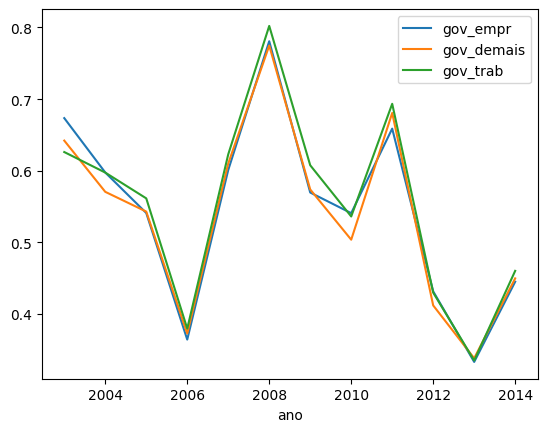

In [96]:
df_gov_empresarios.join(df_gov_demais).join(df_gov_trab).plot()

In [71]:
from ydata_profiling import ProfileReport

e:\Python\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [72]:
profile = ProfileReport(df_merge_ocup, title="Pandas Profiling Report")

In [74]:
profile.to_file('Profile - panel.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 18.53it/s]
